In [ ]:
#vit 필요

from tensorflow.keras.activations import gelu
!pip install tensorflow_addons
import tensorflow_addons as tfa
from typing import List, Tuple

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import json
import os


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import os
import time
import shutil
import tarfile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import urllib.request

import pandas as pd
from tensorflow.keras.models import Model

import tensorflow as tf
from collections import Counter, defaultdict


In [ ]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
import transformers

In [ ]:
data_path = Path('/content/drive/MyDrive/Dataset/raw-img')
data_path

PosixPath('/content/drive/MyDrive/Dataset/raw-img')

In [ ]:
folder_list=list(data_path.glob('*'))

In [ ]:
folder_list

[PosixPath('/content/drive/MyDrive/Dataset/raw-img/mucca'),
 PosixPath('/content/drive/MyDrive/Dataset/raw-img/farfalla'),
 PosixPath('/content/drive/MyDrive/Dataset/raw-img/gallina'),
 PosixPath('/content/drive/MyDrive/Dataset/raw-img/cavallo'),
 PosixPath('/content/drive/MyDrive/Dataset/raw-img/pecora'),
 PosixPath('/content/drive/MyDrive/Dataset/raw-img/gatto'),
 PosixPath('/content/drive/MyDrive/Dataset/raw-img/cane'),
 PosixPath('/content/drive/MyDrive/Dataset/raw-img/scoiattolo'),
 PosixPath('/content/drive/MyDrive/Dataset/raw-img/ragno'),
 PosixPath('/content/drive/MyDrive/Dataset/raw-img/elefante')]

In [ ]:

import json
from pathlib import Path

image_data = defaultdict(list)

for folder in folder_list:
    folder_name = folder.name
    image_paths = [str(image) for image in folder.glob('*.jpeg')]
    image_data[folder_name] = image_paths

with open('image_data.json', 'w') as f:
    json.dump(image_data, f)

with open('image_data.json', 'r') as f:
    image_data = json.load(f)

image_data.keys()

dict_keys(['mucca', 'farfalla', 'gallina', 'cavallo', 'pecora', 'gatto', 'cane', 'scoiattolo', 'ragno', 'elefante'])

In [ ]:
image_data['mucca'][0]

'/content/drive/MyDrive/Dataset/raw-img/mucca/OIP-6XBZIAF5HUK7s1CfQZmR2gHaES.jpeg'

(174, 300, 3)


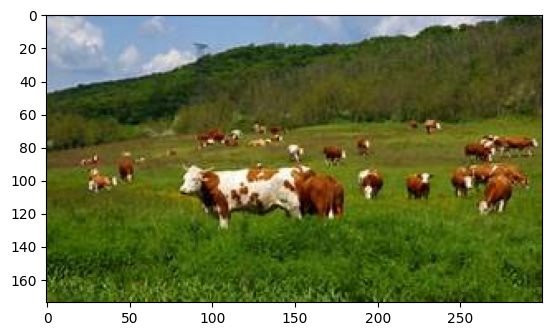

(200, 300, 3)


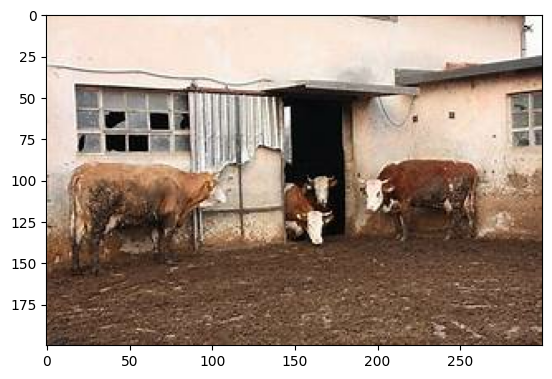

(192, 300, 3)


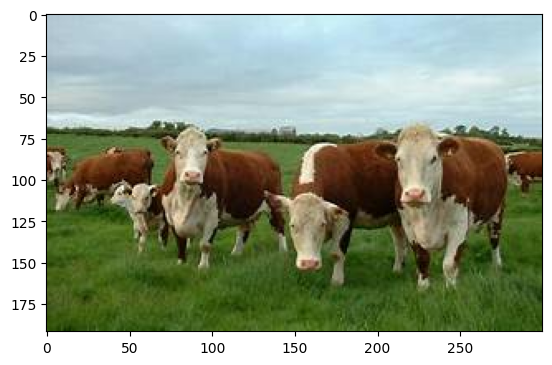

In [ ]:
# prompt: 이미지를 path를 통해 가져오는거

import io
from PIL import Image
import numpy as np

def load_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image)
    return image

for i,image_path in enumerate(image_data['mucca']):
    image = load_image(image_path)
    print(image.shape)
    plt.imshow(image)
    plt.show()
    if i ==2:
        break

In [ ]:
list(image_data.items())[0][0]

'mucca'

In [ ]:

image_paths = []
labels = []
for folder_name, image_paths_ in image_data.items(): # -> mucca, [mucca1, mucca2, mucca3....]
    for image_path in image_paths_:
        image_paths.append(image_path)
        labels.append(folder_name)

df = pd.DataFrame({'image_path': image_paths, 'label': labels})
df.head()


,image_path,label
0,/content/drive/MyDrive/Dataset/raw-img/mucca/O...,mucca
1,/content/drive/MyDrive/Dataset/raw-img/mucca/O...,mucca
2,/content/drive/MyDrive/Dataset/raw-img/mucca/O...,mucca
3,/content/drive/MyDrive/Dataset/raw-img/mucca/O...,mucca
4,/content/drive/MyDrive/Dataset/raw-img/mucca/O...,mucca


In [ ]:
df.shape

(24335, 2)

In [ ]:
df['label'].value_counts()

cane          4875
ragno         4580
gallina       3098
cavallo       2623
scoiattolo    1872
mucca         1866
farfalla      1650
pecora        1444
gatto         1248
elefante      1079
Name: label, dtype: int64

In [ ]:
df['label'] = df['label'].map({
    'cane': 0,
    'ragno': 1,
    'gallina': 2,
    'cavallo': 3,
    'scoiattolo': 4,
    'mucca': 5,
    'farfalla': 6,
    'pecora': 7,
    'gatto': 8,
    'elefante': 9
})


In [ ]:
df.head(3)

,image_path,label
0,/content/drive/MyDrive/Dataset/raw-img/mucca/O...,5
1,/content/drive/MyDrive/Dataset/raw-img/mucca/O...,5
2,/content/drive/MyDrive/Dataset/raw-img/mucca/O...,5


In [ ]:
df.label.value_counts()

0    4875
1    4580
2    3098
3    2623
4    1872
5    1866
6    1650
7    1444
8    1248
9    1079
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train_data,valid_data, train_labels,valid_labels = \
    train_test_split(df['image_path'], df['label'], test_size=0.2, random_state=42)
train_data,test_data, train_labels,test_labels = \
    train_test_split(train_data, train_labels, test_size=0.2, random_state=42)
"""
train_data, train_labels 0.6
valid_data, valid_labels 0.2
test_data, test_labels 0.2
"""
print(train_data.shape, valid_data.shape, test_data.shape)
print(train_labels.shape, valid_labels.shape, test_labels.shape)

(15574,) (4867,) (3894,)
(15574,) (4867,) (3894,)


In [ ]:
def get_image_shape(image_path):
    try:
        img = Image.open(image_path)
        return img.size
    except Exception as e:
        print(f" path Error {image_path}:{e}")
        return None



In [ ]:
train_data.shape

(15574,)

In [ ]:
use_colab = True
assert use_colab in [True, False]
is_train = True
model_name = 'u-net'
assert model_name in ['ed_model', 'u-net']

In [ ]:
if use_colab:
    checkpoint_dir ='/content/drive/MyDrive/아이펠/ai_트랙/train_ckpt/fifth_week/exp1'
    if not os.path.isdir(checkpoint_dir):
        os.makedirs(checkpoint_dir)
else:
    checkpoint_dir = './train_ckpt/segmentation/exp1'

In [ ]:
kargs ={
    'image_size' : 224,
    'img_shape' : (224, 224, 3),
    'batch_size' : 2,
    'max_epochs' :200,
    'AUTOTUNE' : tf.data.experimental.AUTOTUNE,
    'checkpoint_dir' : checkpoint_dir,
    'optimizer' : tf.keras.optimizers.Adam(1e-4),
    'num_classes' : 10
}

# learning_rate = 0.001
# weight_decay = 0.0001
# batch_size = 32
# num_epochs = 10  # For real training, use num_epochs=100. 10 is a test value
# image_size = 224  # We'll resize input images to this size
# patch_size = 32  # Size of the patches to be extract from the input images
# num_patches = (image_size // patch_size) ** 2
# num_heads = 12
# num_layers = 12
# mlp_dim =3072
# dropout_rate = 0.1
# num_channels = 3

kargs['num_layers'] = 12
kargs['hidden_dim'] = 768 #####assert d_model should be divided by num_heads
kargs['mlp_dim'] = 3072 ######dff shoud be d_model * 4
kargs['num_heads'] = 12
kargs['dropout_rate'] = 0.1
kargs['patch_size'] = 14
kargs['num_patches'] = (kargs['image_size'] // kargs['patch_size']) ** 2 ##256
kargs['num_channels'] =3

#### Transformed Input (num_patches,patch_size, patch_size, channels)

In [ ]:
train_data[0]

'/content/drive/MyDrive/Dataset/raw-img/mucca/OIP-6XBZIAF5HUK7s1CfQZmR2gHaES.jpeg'

### Dataloader

In [ ]:
def preprocess_and_augment(image_path, label, training = True):
    image = tf.io.read_file(image_path)
    print(image.shape)
    image = tf.image.decode_jpeg(image, channels=3)
    print(image.shape)
    # 이미지 증강
    if training:
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)
        image = tf.image.random_brightness(image, max_delta=0.2)
        image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    # 이미지 크기 조절 및 정규화
    scale = 1 / 255.
    image = tf.image.resize(image, [224, 224])
    image = image * scale  # 0에서 1 사이의 값으로 정규화

    label = tf.cast(label, np.int32)
    return image, label

In [ ]:
def one_hot_label(image, label):
    label = tf.one_hot(label, depth=10)
    return image, label

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(1000)
# train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.map(preprocess_and_augment, num_parallel_calls=kargs['AUTOTUNE'])
train_dataset = train_dataset.cache().repeat().batch(kargs['batch_size']).prefetch(kargs['AUTOTUNE'])

()
(None, None, 3)


In [ ]:
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_data, valid_labels))
# valid_dataset = valid_dataset.map(one_hot_label)
valid_dataset = valid_dataset.map(lambda x, y: preprocess_and_augment(x, y, training=False) , num_parallel_calls=kargs['AUTOTUNE'])
valid_dataset = valid_dataset.cache().batch(batch_size=kargs['batch_size']).prefetch(kargs['AUTOTUNE'])


()
(None, None, 3)


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
# test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.map(lambda x, y: preprocess_and_augment(x, y, training=False) , num_parallel_calls=kargs['AUTOTUNE'])
test_dataset = test_dataset.batch(batch_size=kargs['batch_size'])


()
(None, None, 3)


In [ ]:
train_dataset, valid_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [ ]:
for data, label in test_dataset:
    print(data,label)
    break

tf.Tensor(
[[[[7.89203823e-01 7.85947561e-01 7.67600179e-01]
   [8.17540824e-01 8.13549221e-01 7.72126436e-01]
   [8.75185728e-01 8.70668948e-01 7.93056667e-01]
   ...
   [6.48784876e-01 6.47244394e-01 5.76060891e-01]
   [6.17050588e-01 6.28815293e-01 5.50522566e-01]
   [6.28209352e-01 6.46486640e-01 5.60901225e-01]]

  [[7.68801332e-01 7.65545011e-01 7.46951997e-01]
   [7.89350152e-01 7.85358548e-01 7.39809096e-01]
   [8.39279532e-01 8.34762692e-01 7.55981207e-01]
   ...
   [6.04335248e-01 6.02616608e-01 5.32031417e-01]
   [5.80213428e-01 5.91978133e-01 5.17888546e-01]
   [5.99053323e-01 6.17330611e-01 5.33472061e-01]]

  [[7.60991275e-01 7.58025765e-01 7.34100521e-01]
   [7.68481195e-01 7.64667809e-01 7.14594603e-01]
   [8.06005597e-01 8.01244915e-01 7.21710026e-01]
   ...
   [5.55218160e-01 5.50245047e-01 4.90284145e-01]
   [5.41631877e-01 5.52868247e-01 4.86895621e-01]
   [5.70994556e-01 5.88921666e-01 5.13536632e-01]]

  ...

  [[6.55252159e-01 6.43487453e-01 5.21918833e-01]
   [6

### Model

In [ ]:
# vit base : layers(12), hidden size(768), MLP size(3072), Heads(12), Params(86M)

In [ ]:
class ClassToken(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value = w_init(shape=(1,1, input_shape[-1]), dtype=tf.float32),
            trainable = True
        )
    def call(self,inputs):
        batch_size = tf.shape(inputs)[0]
        hidden_dim = self.w.shape[-1]
        #print(batch_size,hidden_dim) # Tensor("class_token/strided_slice:0", shape=(), dtype=int32) 14
        cls = tf.broadcast_to(self.w, [batch_size,1,hidden_dim])
        cls = tf.cast(cls,dtype=inputs.dtype)
        return cls


In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,**kargs):
        super(EncoderLayer,self).__init__()

        self.num_head = kargs['num_heads']
        self.hidden_dim = kargs['hidden_dim']
        self.dropout_rate = kargs['dropout_rate']
        self.mha = layers.MultiHeadAttention(num_heads = self.num_head, key_dim = self.hidden_dim)
        self.ffn = self.point_wise_feed_forward_network(**kargs)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(self.dropout_rate)
        self.dropout2 = tf.keras.layers.Dropout(self.dropout_rate)

    def point_wise_feed_forward_network(self,**kargs):
         return tf.keras.Sequential([
                   tf.keras.layers.Dense(kargs['mlp_dim'], activation='gelu'),## input_shape을 넣어줘야한다.
                   tf.keras.layers.Dropout(kargs['dropout_rate']),
                   tf.keras.layers.Dense(kargs['hidden_dim']),  #257,mlp_dim ->  257, hidden_dim
                   tf.keras.layers.Dropout(kargs['dropout_rate']),
                   ])
    def call(self, x):
        # print(f'before EncdoerLayer Input:{x.shape}')
        attn_output, _ =self.mha(x,x,return_attention_scores=True)
        # print(f'attn_output:{attn_output.shape}')
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x+attn_output)
        # print(f'out1.shape:{out1.shape}') # out1.shape:(3, 257, 768)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2, attn_output

In [ ]:
def positional_encoding(position_sequence = kargs['num_patches'],hidden_dim = kargs['hidden_dim']):
    pos_enc=tf.range(start=0, limit = position_sequence, delta=1)
    pos_emb=layers.Embedding(input_dim=position_sequence, output_dim=hidden_dim)(pos_enc) # (49, 147)

    return pos_emb

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super(Encoder,self).__init__()

        self.hidden_dim = kargs['hidden_dim']
        self.num_layers = kargs['num_layers']

        self.patch_embedding = tf.keras.layers.Dense(kargs['hidden_dim'])
        self.pos_encoding = positional_encoding(kargs['num_patches'],self.hidden_dim)

        self.enc_layers = [EncoderLayer(**kargs) for _ in range(self.num_layers)]
        self.clsToken = ClassToken()
        self.dropout =tf.keras.layers.Dropout(kargs['dropout_rate'])

    def call(self, x):
        attn = None ################## 이게 뭐 뜻하는건지 모름
        # seq_len = tf.shape(x)[1] ######## sequence일떄는 그것의 길이 만큼 데이터니까 하지만 여기서는 vit

        # adding embedding and position encoding 그리고 cls token 또한 합쳐지는 곳
        x = self.patch_embedding(x)
        # print(f'patch_embedding:{x.shape}') # (None, 50,768
        x *= tf.math.sqrt(tf.cast(self.hidden_dim, tf.float32))
        x += self.pos_encoding
        ############################################### 여기서 cls token 합쳐짐 나중에 DeiT 도 해보자
        token = self.clsToken(x)
        # print(f'token.shape:{token.shape}')
        x = tf.concat([token, x],1) #(None, 50, 49*3 -->768)
        # print(f'concated_token_pos_enc:{x.shape}')    # 1. kargs
         ################################################2.질문mask
        for layer in self.enc_layers:    ############################################# for만 받아서 쓸려고 '_' 이걸로 그냥 돌리고있었는데
            x, _ = layer(x)    ###listwrap error #list로 만든거니까 i로 12개를 다 이어주기
                                            ########################### 어떻게 i가 선언도 안됬는데 이게 돌아갔지?

        # print(f'enc_layer:{x.shape}')     # (None, 50, 147) ####
        return x


In [ ]:
class Vit(tf.keras.Model):
    def __init__(self, **kargs):
        super(Vit,self).__init__(name = 'Vit')
        self.num_classes = kargs['num_classes']
        self.num_patches = kargs['num_patches']
        self.patch_size = kargs['patch_size']
        self.num_channels = kargs['num_channels']
        self.layerNorm = layers.LayerNormalization()
        self.encoder = Encoder(**kargs)
        self.dropout = tf.keras.layers.Dropout(kargs['dropout_rate'])
        self.classifier = layers.Dense(self.num_classes)

    def call(self,x):

        x = layers.Reshape(target_shape=(self.num_patches, self.patch_size * self.patch_size * self.num_channels))(x)
        # print(f"Reshape:{x.shape}")#(None, 256, 588)
        ##################################################################vit도 마스크가 필요한가? 용도에 다르게 사용
        x = self.encoder(x)
        x = self.layerNorm(x)# (None, 50, 768) ######## 따로 init에 해줘야 trainable variable 변수가 안생긴다.
        x = x[:,0, :] # 첫번째 데이터 만 확
        x = self.dropout(x)
        outputs = self.classifier(x)

        return outputs

In [ ]:
############### outputs
Vit_model = Vit(**kargs)
Vit_model(tf.random.normal([3,224, 224, 3]))
print(Vit_model.summary())

Model: "Vit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization (Layer  multiple                  1536      
 Normalization)                                                  
                                                                 
 encoder (Encoder)           multiple                  397238784 
                                                                 
 dropout_49 (Dropout)        multiple                  0         
                                                                 
 dense_25 (Dense)            multiple                  7690      
                                                                 
Total params: 397248010 (1.48 GB)
Trainable params: 397248010 (1.48 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### vision transformer 만들기


In [ ]:
# class ClassToken(tf.keras.layers.Layer):
#     def __init__(self):
#         super().__init__()
#     def build(self, input_shape):
#         w_init = tf.random_normal_initializer()
#         self.w = tf.Variable(
#             initial_value = w_init(shape=(1,1, input_shape[-1]), dtype=tf.float32),
#             trainable = True
#         )
#     def call(self,inputs):
#         batch_size = tf.shape(inputs)[0]
#         hidden_dim = self.w.shape[-1]
#         #print(batch_size,hidden_dim) # Tensor("class_token/strided_slice:0", shape=(), dtype=int32) 14
#         cls = tf.broadcast_to(self.w, [batch_size,1,hidden_dim])
#         cls = tf.cast(cls,dtype=inputs.dtype)
#         return cls

# # def mlp(x,kargs):
# #     x = layers.Dense(kargs['mlp_dim'],activation='gelu')(x)
# #     x = layers.Dropout(kargs['dropout_rate'])(x)
# #     x = layers.Dense(kargs['hidden_dim'])(x)
# #     x = layers.Dropout(kargs['dropout_rate'])(x)
# #     return x

# # def transformer_encoder(x,kargs):
# #     skip_1 = x
# #     x = layers.LayerNormalization()(x)
# #     attn_output, x = layers.MultiHeadAttention(
# #         num_heads = kargs['num_heads'],
# #         key_dim = kargs['hidden_dim'],
# #         return_attention_scores=True
# #     )(x,x)
# #     x = layers.Add()([x, skip_1])

# #     skip_2 =x
# #     x = layers.LayerNormalization()(x)
# #     x = mlp(x,kargs)
# #     x = layers.Add()([x,skip_2])
# #     return x

# def Vit(kargs):
#     """Inputs"""
#     input_tensor = layers.Input(shape=(224,224,3))#input_tensor:(None, 224, 224, 3)
#     print(f"input_tensor:{input_tensor.shape}")
#     # x = layers.Flatten()(input_tensor) # (None, 224*224*3)
#     # print(f"Dense:{x.shape}")
#     x = layers.Reshape(target_shape=(kargs['num_patches'],kargs['patch_size']*kargs['patch_size']*kargs['num_channels']))(input_tensor)
#     print(f"Reshape:{x.shape}")#(None, 49, 3072)

#     """ Patch + Position Embeddings"""
#     patch_embed = layers.Dense(kargs['hidden_dim'])(x) ##(49,147)
#     print(f'patch_embed.shape:{patch_embed.shape}')

#     positions = tf.range(start=0, limit = kargs['num_patches'], delta=1) #(49,)
#     print(f'positions:{positions.shape}')
#     pos_embed = layers.Embedding(input_dim=kargs['num_patches'], output_dim=kargs['hidden_dim'])(positions) # (49, 147)

#     embed = patch_embed + pos_embed # (None, 49, 147)
#     print(f'embed:{embed.shape}')


#     """ Adding Class Token """
#     token = ClassToken()(embed)
#     x = tf.concat([token, embed],1) #(None, 50, 147)

#     """Transformer encoding"""
#     for _ in range(kargs['num_layers']):
#         x = transformer_encoder(x,kargs) # (None, 50, 147)
#     # print(x.shape)
#     """ Classification Head """
#     x = layers.LayerNormalization()(x)# (None, 50, 147)
#     x = x[:,0, :]
#     # print(x.shape) # (None, 147)
#     x = layers.Dropout(kargs['dropout_rate'])(x)
#     outputs = layers.Dense(10)(x)

#     model = Model(input_tensor,outputs)
#     return model




### compile

In [ ]:
Vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Checkpoints

In [ ]:
optimizer=kargs['optimizer']

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
if not tf.io.gfile.exists(checkpoint_dir):
    tf.io.gfile.makedirs(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

if is_train:
    checkpoint = tf.train.Checkpoint(optimizer=kargs['optimizer'],
                                   model=Vit_model)
else:
    checkpoint = tf.train.Checkpoint(model=Vit_model)

In [ ]:
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10)
cp_callback = ModelCheckpoint(
    kargs['checkpoint_dir'], monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

In [ ]:
# using `tf.data.Dataset`
history = Vit_model.fit(train_dataset,
                    steps_per_epoch=len(train_data) // kargs['batch_size'],
                    epochs=kargs['max_epochs'],
                    callbacks=[earlystop_callback, cp_callback],
                    validation_data=valid_dataset,
                    validation_steps=len(valid_data) // kargs['batch_size'])

# 전체 데이터 갯수 / 배치 사이즈 = steps 수

Epoch 1/200
 271/7787 [>.............................] - ETA: 1:18:05 - loss: 3.0182 - accuracy: 0.1292

KeyboardInterrupt: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(33)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Valid Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Valid Loss')
plt.show()

In [ ]:
results = Vit_model.evaluate(test_dataset, steps=len(test_data) // kargs['batch_size'])
print(results)

In [ ]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))